In [1]:
from IPython.display import Markdown, display
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
# Display options
pd.set_option('display.max_columns', None)

# Matplotlib configuration
plt.style.use('classic')

In [3]:
# Auxiliary functions

def one_hot_encode_dataset(data: pd.DataFrame) -> pd.DataFrame:
    """
    One-hot encodes categorical variables in the dataset.

    Parameters:
    data (pd.DataFrame): Input dataset.

    Returns:
    pd.DataFrame: Encoded dataset.
    """
    # Identify categorical variables
    categorical_features = data.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to the categorical variables
    encoded_data = pd.get_dummies(data, columns=categorical_features)

    return encoded_data


def map_categorical_features(data: pd.DataFrame) -> pd.DataFrame:
    """
    Maps categorical features in the dataset to predefined categories.

    Parameters:
    data (pd.DataFrame): Input dataset.

    Returns:
    pd.DataFrame: Dataset with mapped categorical features.
    """
    # Define mappings
    MSSubClass_mapping = {
        20: '1-STORY 1946 & NEWER ALL STYLES',
        30: '1-STORY 1945 & OLDER',
        40: '1-STORY W/FINISHED ATTIC ALL AGES',
        45: '1-1/2 STORY - UNFINISHED ALL AGES',
        50: '1-1/2 STORY FINISHED ALL AGES',
        60: '2-STORY 1946 & NEWER',
        70: '2-STORY 1945 & OLDER',
        75: '2-1/2 STORY ALL AGES',
        80: 'SPLIT OR MULTI-LEVEL',
        85: 'SPLIT FOYER',
        90: 'DUPLEX - ALL STYLES AND AGES',
        120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
        150: '1-1/2 STORY PUD - ALL AGES',
        160: '2-STORY PUD - 1946 & NEWER',
        180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
        190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
    }

    OverallQual_mapping = {
        10: 'Very Excellent',
        9: 'Excellent',
        8: 'Very Good',
        7: 'Good',
        6: 'Above Average',
        5: 'Average',
        4: 'Below Average',
        3: 'Fair',
        2: 'Poor',
        1: 'Very Poor'
    }

    OverallCond_mapping = OverallQual_mapping

    # Apply mappings
    data['MSSubClass'] = data['MSSubClass'].map(MSSubClass_mapping)
    data['OverallQual'] = data['OverallQual'].map(OverallQual_mapping)
    data['OverallCond'] = data['OverallCond'].map(OverallCond_mapping)

    return data


## **1.** Load train dataset
Load train dataset into workspace.

In [4]:
# Load train dataset
df = pd.read_csv('data/train.csv')
df_html = df.head(5).to_html()
display(Markdown(f"#### **Dataset preview**\n{df_html} \n\n"))
display(Markdown(f"\n\nRows: {df.shape[0]}, Columns: {df.shape[1]}"))

#### **Dataset preview**
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Id</th>
      <th>MSSubClass</th>
      <th>MSZoning</th>
      <th>LotFrontage</th>
      <th>LotArea</th>
      <th>Street</th>
      <th>Alley</th>
      <th>LotShape</th>
      <th>LandContour</th>
      <th>Utilities</th>
      <th>LotConfig</th>
      <th>LandSlope</th>
      <th>Neighborhood</th>
      <th>Condition1</th>
      <th>Condition2</th>
      <th>BldgType</th>
      <th>HouseStyle</th>
      <th>OverallQual</th>
      <th>OverallCond</th>
      <th>YearBuilt</th>
      <th>YearRemodAdd</th>
      <th>RoofStyle</th>
      <th>RoofMatl</th>
      <th>Exterior1st</th>
      <th>Exterior2nd</th>
      <th>MasVnrType</th>
      <th>MasVnrArea</th>
      <th>ExterQual</th>
      <th>ExterCond</th>
      <th>Foundation</th>
      <th>BsmtQual</th>
      <th>BsmtCond</th>
      <th>BsmtExposure</th>
      <th>BsmtFinType1</th>
      <th>BsmtFinSF1</th>
      <th>BsmtFinType2</th>
      <th>BsmtFinSF2</th>
      <th>BsmtUnfSF</th>
      <th>TotalBsmtSF</th>
      <th>Heating</th>
      <th>HeatingQC</th>
      <th>CentralAir</th>
      <th>Electrical</th>
      <th>1stFlrSF</th>
      <th>2ndFlrSF</th>
      <th>LowQualFinSF</th>
      <th>GrLivArea</th>
      <th>BsmtFullBath</th>
      <th>BsmtHalfBath</th>
      <th>FullBath</th>
      <th>HalfBath</th>
      <th>BedroomAbvGr</th>
      <th>KitchenAbvGr</th>
      <th>KitchenQual</th>
      <th>TotRmsAbvGrd</th>
      <th>Functional</th>
      <th>Fireplaces</th>
      <th>FireplaceQu</th>
      <th>GarageType</th>
      <th>GarageYrBlt</th>
      <th>GarageFinish</th>
      <th>GarageCars</th>
      <th>GarageArea</th>
      <th>GarageQual</th>
      <th>GarageCond</th>
      <th>PavedDrive</th>
      <th>WoodDeckSF</th>
      <th>OpenPorchSF</th>
      <th>EnclosedPorch</th>
      <th>3SsnPorch</th>
      <th>ScreenPorch</th>
      <th>PoolArea</th>
      <th>PoolQC</th>
      <th>Fence</th>
      <th>MiscFeature</th>
      <th>MiscVal</th>
      <th>MoSold</th>
      <th>YrSold</th>
      <th>SaleType</th>
      <th>SaleCondition</th>
      <th>SalePrice</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>60</td>
      <td>RL</td>
      <td>65.0</td>
      <td>8450</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>Reg</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>Inside</td>
      <td>Gtl</td>
      <td>CollgCr</td>
      <td>Norm</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>2Story</td>
      <td>7</td>
      <td>5</td>
      <td>2003</td>
      <td>2003</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>VinylSd</td>
      <td>VinylSd</td>
      <td>BrkFace</td>
      <td>196.0</td>
      <td>Gd</td>
      <td>TA</td>
      <td>PConc</td>
      <td>Gd</td>
      <td>TA</td>
      <td>No</td>
      <td>GLQ</td>
      <td>706</td>
      <td>Unf</td>
      <td>0</td>
      <td>150</td>
      <td>856</td>
      <td>GasA</td>
      <td>Ex</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>856</td>
      <td>854</td>
      <td>0</td>
      <td>1710</td>
      <td>1</td>
      <td>0</td>
      <td>2</td>
      <td>1</td>
      <td>3</td>
      <td>1</td>
      <td>Gd</td>
      <td>8</td>
      <td>Typ</td>
      <td>0</td>
      <td>NaN</td>
      <td>Attchd</td>
      <td>2003.0</td>
      <td>RFn</td>
      <td>2</td>
      <td>548</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>0</td>
      <td>61</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0</td>
      <td>2</td>
      <td>2008</td>
      <td>WD</td>
      <td>Normal</td>
      <td>208500</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>20</td>
      <td>RL</td>
      <td>80.0</td>
      <td>9600</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>Reg</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>FR2</td>
      <td>Gtl</td>
      <td>Veenker</td>
      <td>Feedr</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>1Story</td>
      <td>6</td>
      <td>8</td>
      <td>1976</td>
      <td>1976</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>MetalSd</td>
      <td>MetalSd</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>TA</td>
      <td>TA</td>
      <td>CBlock</td>
      <td>Gd</td>
      <td>TA</td>
      <td>Gd</td>
      <td>ALQ</td>
      <td>978</td>
      <td>Unf</td>
      <td>0</td>
      <td>284</td>
      <td>1262</td>
      <td>GasA</td>
      <td>Ex</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>1262</td>
      <td>0</td>
      <td>0</td>
      <td>1262</td>
      <td>0</td>
      <td>1</td>
      <td>2</td>
      <td>0</td>
      <td>3</td>
      <td>1</td>
      <td>TA</td>
      <td>6</td>
      <td>Typ</td>
      <td>1</td>
      <td>TA</td>
      <td>Attchd</td>
      <td>1976.0</td>
      <td>RFn</td>
      <td>2</td>
      <td>460</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>298</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0</td>
      <td>5</td>
      <td>2007</td>
      <td>WD</td>
      <td>Normal</td>
      <td>181500</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>60</td>
      <td>RL</td>
      <td>68.0</td>
      <td>11250</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>IR1</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>Inside</td>
      <td>Gtl</td>
      <td>CollgCr</td>
      <td>Norm</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>2Story</td>
      <td>7</td>
      <td>5</td>
      <td>2001</td>
      <td>2002</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>VinylSd</td>
      <td>VinylSd</td>
      <td>BrkFace</td>
      <td>162.0</td>
      <td>Gd</td>
      <td>TA</td>
      <td>PConc</td>
      <td>Gd</td>
      <td>TA</td>
      <td>Mn</td>
      <td>GLQ</td>
      <td>486</td>
      <td>Unf</td>
      <td>0</td>
      <td>434</td>
      <td>920</td>
      <td>GasA</td>
      <td>Ex</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>920</td>
      <td>866</td>
      <td>0</td>
      <td>1786</td>
      <td>1</td>
      <td>0</td>
      <td>2</td>
      <td>1</td>
      <td>3</td>
      <td>1</td>
      <td>Gd</td>
      <td>6</td>
      <td>Typ</td>
      <td>1</td>
      <td>TA</td>
      <td>Attchd</td>
      <td>2001.0</td>
      <td>RFn</td>
      <td>2</td>
      <td>608</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>0</td>
      <td>42</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0</td>
      <td>9</td>
      <td>2008</td>
      <td>WD</td>
      <td>Normal</td>
      <td>223500</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>70</td>
      <td>RL</td>
      <td>60.0</td>
      <td>9550</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>IR1</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>Corner</td>
      <td>Gtl</td>
      <td>Crawfor</td>
      <td>Norm</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>2Story</td>
      <td>7</td>
      <td>5</td>
      <td>1915</td>
      <td>1970</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>Wd Sdng</td>
      <td>Wd Shng</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>TA</td>
      <td>TA</td>
      <td>BrkTil</td>
      <td>TA</td>
      <td>Gd</td>
      <td>No</td>
      <td>ALQ</td>
      <td>216</td>
      <td>Unf</td>
      <td>0</td>
      <td>540</td>
      <td>756</td>
      <td>GasA</td>
      <td>Gd</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>961</td>
      <td>756</td>
      <td>0</td>
      <td>1717</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>3</td>
      <td>1</td>
      <td>Gd</td>
      <td>7</td>
      <td>Typ</td>
      <td>1</td>
      <td>Gd</td>
      <td>Detchd</td>
      <td>1998.0</td>
      <td>Unf</td>
      <td>3</td>
      <td>642</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>0</td>
      <td>35</td>
      <td>272</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0</td>
      <td>2</td>
      <td>2006</td>
      <td>WD</td>
      <td>Abnorml</td>
      <td>140000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>60</td>
      <td>RL</td>
      <td>84.0</td>
      <td>14260</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>IR1</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>FR2</td>
      <td>Gtl</td>
      <td>NoRidge</td>
      <td>Norm</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>2Story</td>
      <td>8</td>
      <td>5</td>
      <td>2000</td>
      <td>2000</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>VinylSd</td>
      <td>VinylSd</td>
      <td>BrkFace</td>
      <td>350.0</td>
      <td>Gd</td>
      <td>TA</td>
      <td>PConc</td>
      <td>Gd</td>
      <td>TA</td>
      <td>Av</td>
      <td>GLQ</td>
      <td>655</td>
      <td>Unf</td>
      <td>0</td>
      <td>490</td>
      <td>1145</td>
      <td>GasA</td>
      <td>Ex</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>1145</td>
      <td>1053</td>
      <td>0</td>
      <td>2198</td>
      <td>1</td>
      <td>0</td>
      <td>2</td>
      <td>1</td>
      <td>4</td>
      <td>1</td>
      <td>Gd</td>
      <td>9</td>
      <td>Typ</td>
      <td>1</td>
      <td>TA</td>
      <td>Attchd</td>
      <td>2000.0</td>
      <td>RFn</td>
      <td>3</td>
      <td>836</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>192</td>
      <td>84</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0</td>
      <td>12</td>
      <td>2008</td>
      <td>WD</td>
      <td>Normal</td>
      <td>250000</td>
    </tr>
  </tbody>
</table> 





Rows: 1460, Columns: 81

## **2.** Summary Statistics

### **2.1** Numerical features analysis

View summary statistics for each numerical features. 

In [5]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe()

# Convert numerical features DataFrame to HTML
numerical_features_html = numerical_features.head(5).to_html()
display(Markdown(f"#### **Numerical features preview**\n{numerical_features_html} \n\n"))
display(Markdown(f"\n\nRows: {numerical_features.shape[0]}, Columns: {numerical_features.shape[1]}"))


# Convert summary statistics DataFrame to HTML
summary_stats_html = summary_stats.to_html()
display(Markdown(f"#### **Summary Statistics for numerical features**\n{summary_stats_html}"))

#### **Numerical features preview**
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Id</th>
      <th>MSSubClass</th>
      <th>LotFrontage</th>
      <th>LotArea</th>
      <th>OverallQual</th>
      <th>OverallCond</th>
      <th>YearBuilt</th>
      <th>YearRemodAdd</th>
      <th>MasVnrArea</th>
      <th>BsmtFinSF1</th>
      <th>BsmtFinSF2</th>
      <th>BsmtUnfSF</th>
      <th>TotalBsmtSF</th>
      <th>1stFlrSF</th>
      <th>2ndFlrSF</th>
      <th>LowQualFinSF</th>
      <th>GrLivArea</th>
      <th>BsmtFullBath</th>
      <th>BsmtHalfBath</th>
      <th>FullBath</th>
      <th>HalfBath</th>
      <th>BedroomAbvGr</th>
      <th>KitchenAbvGr</th>
      <th>TotRmsAbvGrd</th>
      <th>Fireplaces</th>
      <th>GarageYrBlt</th>
      <th>GarageCars</th>
      <th>GarageArea</th>
      <th>WoodDeckSF</th>
      <th>OpenPorchSF</th>
      <th>EnclosedPorch</th>
      <th>3SsnPorch</th>
      <th>ScreenPorch</th>
      <th>PoolArea</th>
      <th>MiscVal</th>
      <th>MoSold</th>
      <th>YrSold</th>
      <th>SalePrice</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>60</td>
      <td>65.0</td>
      <td>8450</td>
      <td>7</td>
      <td>5</td>
      <td>2003</td>
      <td>2003</td>
      <td>196.0</td>
      <td>706</td>
      <td>0</td>
      <td>150</td>
      <td>856</td>
      <td>856</td>
      <td>854</td>
      <td>0</td>
      <td>1710</td>
      <td>1</td>
      <td>0</td>
      <td>2</td>
      <td>1</td>
      <td>3</td>
      <td>1</td>
      <td>8</td>
      <td>0</td>
      <td>2003.0</td>
      <td>2</td>
      <td>548</td>
      <td>0</td>
      <td>61</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>2</td>
      <td>2008</td>
      <td>208500</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>20</td>
      <td>80.0</td>
      <td>9600</td>
      <td>6</td>
      <td>8</td>
      <td>1976</td>
      <td>1976</td>
      <td>0.0</td>
      <td>978</td>
      <td>0</td>
      <td>284</td>
      <td>1262</td>
      <td>1262</td>
      <td>0</td>
      <td>0</td>
      <td>1262</td>
      <td>0</td>
      <td>1</td>
      <td>2</td>
      <td>0</td>
      <td>3</td>
      <td>1</td>
      <td>6</td>
      <td>1</td>
      <td>1976.0</td>
      <td>2</td>
      <td>460</td>
      <td>298</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>5</td>
      <td>2007</td>
      <td>181500</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>60</td>
      <td>68.0</td>
      <td>11250</td>
      <td>7</td>
      <td>5</td>
      <td>2001</td>
      <td>2002</td>
      <td>162.0</td>
      <td>486</td>
      <td>0</td>
      <td>434</td>
      <td>920</td>
      <td>920</td>
      <td>866</td>
      <td>0</td>
      <td>1786</td>
      <td>1</td>
      <td>0</td>
      <td>2</td>
      <td>1</td>
      <td>3</td>
      <td>1</td>
      <td>6</td>
      <td>1</td>
      <td>2001.0</td>
      <td>2</td>
      <td>608</td>
      <td>0</td>
      <td>42</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>9</td>
      <td>2008</td>
      <td>223500</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>70</td>
      <td>60.0</td>
      <td>9550</td>
      <td>7</td>
      <td>5</td>
      <td>1915</td>
      <td>1970</td>
      <td>0.0</td>
      <td>216</td>
      <td>0</td>
      <td>540</td>
      <td>756</td>
      <td>961</td>
      <td>756</td>
      <td>0</td>
      <td>1717</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>3</td>
      <td>1</td>
      <td>7</td>
      <td>1</td>
      <td>1998.0</td>
      <td>3</td>
      <td>642</td>
      <td>0</td>
      <td>35</td>
      <td>272</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>2</td>
      <td>2006</td>
      <td>140000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>60</td>
      <td>84.0</td>
      <td>14260</td>
      <td>8</td>
      <td>5</td>
      <td>2000</td>
      <td>2000</td>
      <td>350.0</td>
      <td>655</td>
      <td>0</td>
      <td>490</td>
      <td>1145</td>
      <td>1145</td>
      <td>1053</td>
      <td>0</td>
      <td>2198</td>
      <td>1</td>
      <td>0</td>
      <td>2</td>
      <td>1</td>
      <td>4</td>
      <td>1</td>
      <td>9</td>
      <td>1</td>
      <td>2000.0</td>
      <td>3</td>
      <td>836</td>
      <td>192</td>
      <td>84</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>12</td>
      <td>2008</td>
      <td>250000</td>
    </tr>
  </tbody>
</table> 





Rows: 1460, Columns: 38

#### **Summary Statistics for numerical features**
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Id</th>
      <th>MSSubClass</th>
      <th>LotFrontage</th>
      <th>LotArea</th>
      <th>OverallQual</th>
      <th>OverallCond</th>
      <th>YearBuilt</th>
      <th>YearRemodAdd</th>
      <th>MasVnrArea</th>
      <th>BsmtFinSF1</th>
      <th>BsmtFinSF2</th>
      <th>BsmtUnfSF</th>
      <th>TotalBsmtSF</th>
      <th>1stFlrSF</th>
      <th>2ndFlrSF</th>
      <th>LowQualFinSF</th>
      <th>GrLivArea</th>
      <th>BsmtFullBath</th>
      <th>BsmtHalfBath</th>
      <th>FullBath</th>
      <th>HalfBath</th>
      <th>BedroomAbvGr</th>
      <th>KitchenAbvGr</th>
      <th>TotRmsAbvGrd</th>
      <th>Fireplaces</th>
      <th>GarageYrBlt</th>
      <th>GarageCars</th>
      <th>GarageArea</th>
      <th>WoodDeckSF</th>
      <th>OpenPorchSF</th>
      <th>EnclosedPorch</th>
      <th>3SsnPorch</th>
      <th>ScreenPorch</th>
      <th>PoolArea</th>
      <th>MiscVal</th>
      <th>MoSold</th>
      <th>YrSold</th>
      <th>SalePrice</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1201.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1452.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1379.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
      <td>1460.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>730.500000</td>
      <td>56.897260</td>
      <td>70.049958</td>
      <td>10516.828082</td>
      <td>6.099315</td>
      <td>5.575342</td>
      <td>1971.267808</td>
      <td>1984.865753</td>
      <td>103.685262</td>
      <td>443.639726</td>
      <td>46.549315</td>
      <td>567.240411</td>
      <td>1057.429452</td>
      <td>1162.626712</td>
      <td>346.992466</td>
      <td>5.844521</td>
      <td>1515.463699</td>
      <td>0.425342</td>
      <td>0.057534</td>
      <td>1.565068</td>
      <td>0.382877</td>
      <td>2.866438</td>
      <td>1.046575</td>
      <td>6.517808</td>
      <td>0.613014</td>
      <td>1978.506164</td>
      <td>1.767123</td>
      <td>472.980137</td>
      <td>94.244521</td>
      <td>46.660274</td>
      <td>21.954110</td>
      <td>3.409589</td>
      <td>15.060959</td>
      <td>2.758904</td>
      <td>43.489041</td>
      <td>6.321918</td>
      <td>2007.815753</td>
      <td>180921.195890</td>
    </tr>
    <tr>
      <th>std</th>
      <td>421.610009</td>
      <td>42.300571</td>
      <td>24.284752</td>
      <td>9981.264932</td>
      <td>1.382997</td>
      <td>1.112799</td>
      <td>30.202904</td>
      <td>20.645407</td>
      <td>181.066207</td>
      <td>456.098091</td>
      <td>161.319273</td>
      <td>441.866955</td>
      <td>438.705324</td>
      <td>386.587738</td>
      <td>436.528436</td>
      <td>48.623081</td>
      <td>525.480383</td>
      <td>0.518911</td>
      <td>0.238753</td>
      <td>0.550916</td>
      <td>0.502885</td>
      <td>0.815778</td>
      <td>0.220338</td>
      <td>1.625393</td>
      <td>0.644666</td>
      <td>24.689725</td>
      <td>0.747315</td>
      <td>213.804841</td>
      <td>125.338794</td>
      <td>66.256028</td>
      <td>61.119149</td>
      <td>29.317331</td>
      <td>55.757415</td>
      <td>40.177307</td>
      <td>496.123024</td>
      <td>2.703626</td>
      <td>1.328095</td>
      <td>79442.502883</td>
    </tr>
    <tr>
      <th>min</th>
      <td>1.000000</td>
      <td>20.000000</td>
      <td>21.000000</td>
      <td>1300.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1872.000000</td>
      <td>1950.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>334.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>334.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>2.000000</td>
      <td>0.000000</td>
      <td>1900.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>1.000000</td>
      <td>2006.000000</td>
      <td>34900.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>365.750000</td>
      <td>20.000000</td>
      <td>59.000000</td>
      <td>7553.500000</td>
      <td>5.000000</td>
      <td>5.000000</td>
      <td>1954.000000</td>
      <td>1967.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>223.000000</td>
      <td>795.750000</td>
      <td>882.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>1129.500000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>2.000000</td>
      <td>1.000000</td>
      <td>5.000000</td>
      <td>0.000000</td>
      <td>1961.000000</td>
      <td>1.000000</td>
      <td>334.500000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>5.000000</td>
      <td>2007.000000</td>
      <td>129975.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>730.500000</td>
      <td>50.000000</td>
      <td>69.000000</td>
      <td>9478.500000</td>
      <td>6.000000</td>
      <td>5.000000</td>
      <td>1973.000000</td>
      <td>1994.000000</td>
      <td>0.000000</td>
      <td>383.500000</td>
      <td>0.000000</td>
      <td>477.500000</td>
      <td>991.500000</td>
      <td>1087.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>1464.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>2.000000</td>
      <td>0.000000</td>
      <td>3.000000</td>
      <td>1.000000</td>
      <td>6.000000</td>
      <td>1.000000</td>
      <td>1980.000000</td>
      <td>2.000000</td>
      <td>480.000000</td>
      <td>0.000000</td>
      <td>25.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>6.000000</td>
      <td>2008.000000</td>
      <td>163000.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>1095.250000</td>
      <td>70.000000</td>
      <td>80.000000</td>
      <td>11601.500000</td>
      <td>7.000000</td>
      <td>6.000000</td>
      <td>2000.000000</td>
      <td>2004.000000</td>
      <td>166.000000</td>
      <td>712.250000</td>
      <td>0.000000</td>
      <td>808.000000</td>
      <td>1298.250000</td>
      <td>1391.250000</td>
      <td>728.000000</td>
      <td>0.000000</td>
      <td>1776.750000</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>2.000000</td>
      <td>1.000000</td>
      <td>3.000000</td>
      <td>1.000000</td>
      <td>7.000000</td>
      <td>1.000000</td>
      <td>2002.000000</td>
      <td>2.000000</td>
      <td>576.000000</td>
      <td>168.000000</td>
      <td>68.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>8.000000</td>
      <td>2009.000000</td>
      <td>214000.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>1460.000000</td>
      <td>190.000000</td>
      <td>313.000000</td>
      <td>215245.000000</td>
      <td>10.000000</td>
      <td>9.000000</td>
      <td>2010.000000</td>
      <td>2010.000000</td>
      <td>1600.000000</td>
      <td>5644.000000</td>
      <td>1474.000000</td>
      <td>2336.000000</td>
      <td>6110.000000</td>
      <td>4692.000000</td>
      <td>2065.000000</td>
      <td>572.000000</td>
      <td>5642.000000</td>
      <td>3.000000</td>
      <td>2.000000</td>
      <td>3.000000</td>
      <td>2.000000</td>
      <td>8.000000</td>
      <td>3.000000</td>
      <td>14.000000</td>
      <td>3.000000</td>
      <td>2010.000000</td>
      <td>4.000000</td>
      <td>1418.000000</td>
      <td>857.000000</td>
      <td>547.000000</td>
      <td>552.000000</td>
      <td>508.000000</td>
      <td>480.000000</td>
      <td>738.000000</td>
      <td>15500.000000</td>
      <td>12.000000</td>
      <td>2010.000000</td>
      <td>755000.000000</td>
    </tr>
  </tbody>
</table>

### **2.2** Categorical features analysis

View summary statistics for each categorical features. 

In [7]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
summary_stats = categorical_features.describe()

# Convert categorical features DataFrame to HTML
categorical_features_html = categorical_features.head(5).to_html()
display(Markdown(f"#### **Categorical features preview**\n{categorical_features_html} \n\n"))
display(Markdown(f"\n\nRows: {categorical_features.shape[0]}, Columns: {categorical_features.shape[1]}"))

# Convert summary statistics DataFrame to HTML
summary_stats_html = summary_stats.to_html()
display(Markdown(f"#### **Summary Statistics for categorical features**\n{summary_stats_html}"))

#### **Categorical features preview**
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>MSZoning</th>
      <th>Street</th>
      <th>Alley</th>
      <th>LotShape</th>
      <th>LandContour</th>
      <th>Utilities</th>
      <th>LotConfig</th>
      <th>LandSlope</th>
      <th>Neighborhood</th>
      <th>Condition1</th>
      <th>Condition2</th>
      <th>BldgType</th>
      <th>HouseStyle</th>
      <th>RoofStyle</th>
      <th>RoofMatl</th>
      <th>Exterior1st</th>
      <th>Exterior2nd</th>
      <th>MasVnrType</th>
      <th>ExterQual</th>
      <th>ExterCond</th>
      <th>Foundation</th>
      <th>BsmtQual</th>
      <th>BsmtCond</th>
      <th>BsmtExposure</th>
      <th>BsmtFinType1</th>
      <th>BsmtFinType2</th>
      <th>Heating</th>
      <th>HeatingQC</th>
      <th>CentralAir</th>
      <th>Electrical</th>
      <th>KitchenQual</th>
      <th>Functional</th>
      <th>FireplaceQu</th>
      <th>GarageType</th>
      <th>GarageFinish</th>
      <th>GarageQual</th>
      <th>GarageCond</th>
      <th>PavedDrive</th>
      <th>PoolQC</th>
      <th>Fence</th>
      <th>MiscFeature</th>
      <th>SaleType</th>
      <th>SaleCondition</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>RL</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>Reg</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>Inside</td>
      <td>Gtl</td>
      <td>CollgCr</td>
      <td>Norm</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>2Story</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>VinylSd</td>
      <td>VinylSd</td>
      <td>BrkFace</td>
      <td>Gd</td>
      <td>TA</td>
      <td>PConc</td>
      <td>Gd</td>
      <td>TA</td>
      <td>No</td>
      <td>GLQ</td>
      <td>Unf</td>
      <td>GasA</td>
      <td>Ex</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>Gd</td>
      <td>Typ</td>
      <td>NaN</td>
      <td>Attchd</td>
      <td>RFn</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>WD</td>
      <td>Normal</td>
    </tr>
    <tr>
      <th>1</th>
      <td>RL</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>Reg</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>FR2</td>
      <td>Gtl</td>
      <td>Veenker</td>
      <td>Feedr</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>1Story</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>MetalSd</td>
      <td>MetalSd</td>
      <td>NaN</td>
      <td>TA</td>
      <td>TA</td>
      <td>CBlock</td>
      <td>Gd</td>
      <td>TA</td>
      <td>Gd</td>
      <td>ALQ</td>
      <td>Unf</td>
      <td>GasA</td>
      <td>Ex</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>TA</td>
      <td>Typ</td>
      <td>TA</td>
      <td>Attchd</td>
      <td>RFn</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>WD</td>
      <td>Normal</td>
    </tr>
    <tr>
      <th>2</th>
      <td>RL</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>IR1</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>Inside</td>
      <td>Gtl</td>
      <td>CollgCr</td>
      <td>Norm</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>2Story</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>VinylSd</td>
      <td>VinylSd</td>
      <td>BrkFace</td>
      <td>Gd</td>
      <td>TA</td>
      <td>PConc</td>
      <td>Gd</td>
      <td>TA</td>
      <td>Mn</td>
      <td>GLQ</td>
      <td>Unf</td>
      <td>GasA</td>
      <td>Ex</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>Gd</td>
      <td>Typ</td>
      <td>TA</td>
      <td>Attchd</td>
      <td>RFn</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>WD</td>
      <td>Normal</td>
    </tr>
    <tr>
      <th>3</th>
      <td>RL</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>IR1</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>Corner</td>
      <td>Gtl</td>
      <td>Crawfor</td>
      <td>Norm</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>2Story</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>Wd Sdng</td>
      <td>Wd Shng</td>
      <td>NaN</td>
      <td>TA</td>
      <td>TA</td>
      <td>BrkTil</td>
      <td>TA</td>
      <td>Gd</td>
      <td>No</td>
      <td>ALQ</td>
      <td>Unf</td>
      <td>GasA</td>
      <td>Gd</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>Gd</td>
      <td>Typ</td>
      <td>Gd</td>
      <td>Detchd</td>
      <td>Unf</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>WD</td>
      <td>Abnorml</td>
    </tr>
    <tr>
      <th>4</th>
      <td>RL</td>
      <td>Pave</td>
      <td>NaN</td>
      <td>IR1</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>FR2</td>
      <td>Gtl</td>
      <td>NoRidge</td>
      <td>Norm</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>2Story</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>VinylSd</td>
      <td>VinylSd</td>
      <td>BrkFace</td>
      <td>Gd</td>
      <td>TA</td>
      <td>PConc</td>
      <td>Gd</td>
      <td>TA</td>
      <td>Av</td>
      <td>GLQ</td>
      <td>Unf</td>
      <td>GasA</td>
      <td>Ex</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>Gd</td>
      <td>Typ</td>
      <td>TA</td>
      <td>Attchd</td>
      <td>RFn</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>WD</td>
      <td>Normal</td>
    </tr>
  </tbody>
</table> 





Rows: 1460, Columns: 43

#### **Summary Statistics for categorical features**
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>MSZoning</th>
      <th>Street</th>
      <th>Alley</th>
      <th>LotShape</th>
      <th>LandContour</th>
      <th>Utilities</th>
      <th>LotConfig</th>
      <th>LandSlope</th>
      <th>Neighborhood</th>
      <th>Condition1</th>
      <th>Condition2</th>
      <th>BldgType</th>
      <th>HouseStyle</th>
      <th>RoofStyle</th>
      <th>RoofMatl</th>
      <th>Exterior1st</th>
      <th>Exterior2nd</th>
      <th>MasVnrType</th>
      <th>ExterQual</th>
      <th>ExterCond</th>
      <th>Foundation</th>
      <th>BsmtQual</th>
      <th>BsmtCond</th>
      <th>BsmtExposure</th>
      <th>BsmtFinType1</th>
      <th>BsmtFinType2</th>
      <th>Heating</th>
      <th>HeatingQC</th>
      <th>CentralAir</th>
      <th>Electrical</th>
      <th>KitchenQual</th>
      <th>Functional</th>
      <th>FireplaceQu</th>
      <th>GarageType</th>
      <th>GarageFinish</th>
      <th>GarageQual</th>
      <th>GarageCond</th>
      <th>PavedDrive</th>
      <th>PoolQC</th>
      <th>Fence</th>
      <th>MiscFeature</th>
      <th>SaleType</th>
      <th>SaleCondition</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>1460</td>
      <td>1460</td>
      <td>91</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>588</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1423</td>
      <td>1423</td>
      <td>1422</td>
      <td>1423</td>
      <td>1422</td>
      <td>1460</td>
      <td>1460</td>
      <td>1460</td>
      <td>1459</td>
      <td>1460</td>
      <td>1460</td>
      <td>770</td>
      <td>1379</td>
      <td>1379</td>
      <td>1379</td>
      <td>1379</td>
      <td>1460</td>
      <td>7</td>
      <td>281</td>
      <td>54</td>
      <td>1460</td>
      <td>1460</td>
    </tr>
    <tr>
      <th>unique</th>
      <td>5</td>
      <td>2</td>
      <td>2</td>
      <td>4</td>
      <td>4</td>
      <td>2</td>
      <td>5</td>
      <td>3</td>
      <td>25</td>
      <td>9</td>
      <td>8</td>
      <td>5</td>
      <td>8</td>
      <td>6</td>
      <td>8</td>
      <td>15</td>
      <td>16</td>
      <td>3</td>
      <td>4</td>
      <td>5</td>
      <td>6</td>
      <td>4</td>
      <td>4</td>
      <td>4</td>
      <td>6</td>
      <td>6</td>
      <td>6</td>
      <td>5</td>
      <td>2</td>
      <td>5</td>
      <td>4</td>
      <td>7</td>
      <td>5</td>
      <td>6</td>
      <td>3</td>
      <td>5</td>
      <td>5</td>
      <td>3</td>
      <td>3</td>
      <td>4</td>
      <td>4</td>
      <td>9</td>
      <td>6</td>
    </tr>
    <tr>
      <th>top</th>
      <td>RL</td>
      <td>Pave</td>
      <td>Grvl</td>
      <td>Reg</td>
      <td>Lvl</td>
      <td>AllPub</td>
      <td>Inside</td>
      <td>Gtl</td>
      <td>NAmes</td>
      <td>Norm</td>
      <td>Norm</td>
      <td>1Fam</td>
      <td>1Story</td>
      <td>Gable</td>
      <td>CompShg</td>
      <td>VinylSd</td>
      <td>VinylSd</td>
      <td>BrkFace</td>
      <td>TA</td>
      <td>TA</td>
      <td>PConc</td>
      <td>TA</td>
      <td>TA</td>
      <td>No</td>
      <td>Unf</td>
      <td>Unf</td>
      <td>GasA</td>
      <td>Ex</td>
      <td>Y</td>
      <td>SBrkr</td>
      <td>TA</td>
      <td>Typ</td>
      <td>Gd</td>
      <td>Attchd</td>
      <td>Unf</td>
      <td>TA</td>
      <td>TA</td>
      <td>Y</td>
      <td>Gd</td>
      <td>MnPrv</td>
      <td>Shed</td>
      <td>WD</td>
      <td>Normal</td>
    </tr>
    <tr>
      <th>freq</th>
      <td>1151</td>
      <td>1454</td>
      <td>50</td>
      <td>925</td>
      <td>1311</td>
      <td>1459</td>
      <td>1052</td>
      <td>1382</td>
      <td>225</td>
      <td>1260</td>
      <td>1445</td>
      <td>1220</td>
      <td>726</td>
      <td>1141</td>
      <td>1434</td>
      <td>515</td>
      <td>504</td>
      <td>445</td>
      <td>906</td>
      <td>1282</td>
      <td>647</td>
      <td>649</td>
      <td>1311</td>
      <td>953</td>
      <td>430</td>
      <td>1256</td>
      <td>1428</td>
      <td>741</td>
      <td>1365</td>
      <td>1334</td>
      <td>735</td>
      <td>1360</td>
      <td>380</td>
      <td>870</td>
      <td>605</td>
      <td>1311</td>
      <td>1326</td>
      <td>1340</td>
      <td>3</td>
      <td>157</td>
      <td>49</td>
      <td>1267</td>
      <td>1198</td>
    </tr>
  </tbody>
</table>

### **2.3** Null values in dataset

Percentage of missing values for each feature.

In [8]:
# Calculate the percentage of null values for each column
null_values_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the null values count and percentage
null_values_df = pd.DataFrame({
    'Count': df.isnull().sum(),
    'Percentage': null_values_percentage.round(2)
})

# Display DataFrame
display(Markdown(f"#### **Null values in dataset**\n{null_values_df.T.to_html()}"))

# Filter columns with null values percentage greater than 50%
null_values_df_50 = null_values_df[null_values_df['Percentage'] > 50]

# Display DataFrame showing columns with null values percentage greater than 50%
display(Markdown(f"#### **Null values in dataset (>50%)**\n{null_values_df_50.T.to_html()}"))
display(Markdown(f"Total number of features with null values exceeding 50%: {null_values_df_50.shape[0]} out of {df.shape[1]} features"))

#### **Null values in dataset**
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Id</th>
      <th>MSSubClass</th>
      <th>MSZoning</th>
      <th>LotFrontage</th>
      <th>LotArea</th>
      <th>Street</th>
      <th>Alley</th>
      <th>LotShape</th>
      <th>LandContour</th>
      <th>Utilities</th>
      <th>LotConfig</th>
      <th>LandSlope</th>
      <th>Neighborhood</th>
      <th>Condition1</th>
      <th>Condition2</th>
      <th>BldgType</th>
      <th>HouseStyle</th>
      <th>OverallQual</th>
      <th>OverallCond</th>
      <th>YearBuilt</th>
      <th>YearRemodAdd</th>
      <th>RoofStyle</th>
      <th>RoofMatl</th>
      <th>Exterior1st</th>
      <th>Exterior2nd</th>
      <th>MasVnrType</th>
      <th>MasVnrArea</th>
      <th>ExterQual</th>
      <th>ExterCond</th>
      <th>Foundation</th>
      <th>BsmtQual</th>
      <th>BsmtCond</th>
      <th>BsmtExposure</th>
      <th>BsmtFinType1</th>
      <th>BsmtFinSF1</th>
      <th>BsmtFinType2</th>
      <th>BsmtFinSF2</th>
      <th>BsmtUnfSF</th>
      <th>TotalBsmtSF</th>
      <th>Heating</th>
      <th>HeatingQC</th>
      <th>CentralAir</th>
      <th>Electrical</th>
      <th>1stFlrSF</th>
      <th>2ndFlrSF</th>
      <th>LowQualFinSF</th>
      <th>GrLivArea</th>
      <th>BsmtFullBath</th>
      <th>BsmtHalfBath</th>
      <th>FullBath</th>
      <th>HalfBath</th>
      <th>BedroomAbvGr</th>
      <th>KitchenAbvGr</th>
      <th>KitchenQual</th>
      <th>TotRmsAbvGrd</th>
      <th>Functional</th>
      <th>Fireplaces</th>
      <th>FireplaceQu</th>
      <th>GarageType</th>
      <th>GarageYrBlt</th>
      <th>GarageFinish</th>
      <th>GarageCars</th>
      <th>GarageArea</th>
      <th>GarageQual</th>
      <th>GarageCond</th>
      <th>PavedDrive</th>
      <th>WoodDeckSF</th>
      <th>OpenPorchSF</th>
      <th>EnclosedPorch</th>
      <th>3SsnPorch</th>
      <th>ScreenPorch</th>
      <th>PoolArea</th>
      <th>PoolQC</th>
      <th>Fence</th>
      <th>MiscFeature</th>
      <th>MiscVal</th>
      <th>MoSold</th>
      <th>YrSold</th>
      <th>SaleType</th>
      <th>SaleCondition</th>
      <th>SalePrice</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Count</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>259.00</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1369.00</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>872.00</td>
      <td>8.00</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>37.00</td>
      <td>37.00</td>
      <td>38.0</td>
      <td>37.00</td>
      <td>0.0</td>
      <td>38.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.00</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>690.00</td>
      <td>81.00</td>
      <td>81.00</td>
      <td>81.00</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>81.00</td>
      <td>81.00</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1453.00</td>
      <td>1179.00</td>
      <td>1406.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>Percentage</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>17.74</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>93.77</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>59.73</td>
      <td>0.55</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2.53</td>
      <td>2.53</td>
      <td>2.6</td>
      <td>2.53</td>
      <td>0.0</td>
      <td>2.6</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.07</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>47.26</td>
      <td>5.55</td>
      <td>5.55</td>
      <td>5.55</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>5.55</td>
      <td>5.55</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>99.52</td>
      <td>80.75</td>
      <td>96.3</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>

#### **Null values in dataset (>50%)**
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Alley</th>
      <th>MasVnrType</th>
      <th>PoolQC</th>
      <th>Fence</th>
      <th>MiscFeature</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Count</th>
      <td>1369.00</td>
      <td>872.00</td>
      <td>1453.00</td>
      <td>1179.00</td>
      <td>1406.0</td>
    </tr>
    <tr>
      <th>Percentage</th>
      <td>93.77</td>
      <td>59.73</td>
      <td>99.52</td>
      <td>80.75</td>
      <td>96.3</td>
    </tr>
  </tbody>
</table>

Total number of features with null values exceeding 50%: 5 out of 81 features

## **3.** Linear Regression Analysis

Linear regression analysis to assess the association between the predictor variable ***SalePrice*** and the other variables.

### **3.1** Linear regression

Perform linear regression for prediction and evaluate the model using test data

In [41]:
# TRAIN MODEL
# ------------------------------------------------------------------
split_ratio = 0.85

# Split the data into training and validation sets
Xtrain, Xval, Ytrain, Yval = train_test_split(df.drop(columns=['SalePrice']), 
                                                  df['SalePrice'], 
                                                  test_size=1-split_ratio)

# Drop 'Id' column
X_train = Xtrain.drop(columns=['Id'])
X_val = Xval.drop(columns=['Id'])

# Map dataset values to strings
X_train = map_categorical_features(X_train)
X_val = map_categorical_features(X_val)

# Perform one-hot encoding on the predictor variables
X_train = one_hot_encode_dataset(X_train)
X_val = one_hot_encode_dataset(X_val)

# Convert null values to zero
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

# Create linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Ytrain)

# Map features in validation dataset to match the features in training dataset
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

# Predict on the validation data
y_pred_val = model.predict(X_val)

R^2 score: 0.9115223363999472


R^2 score: 0.9115223363999472


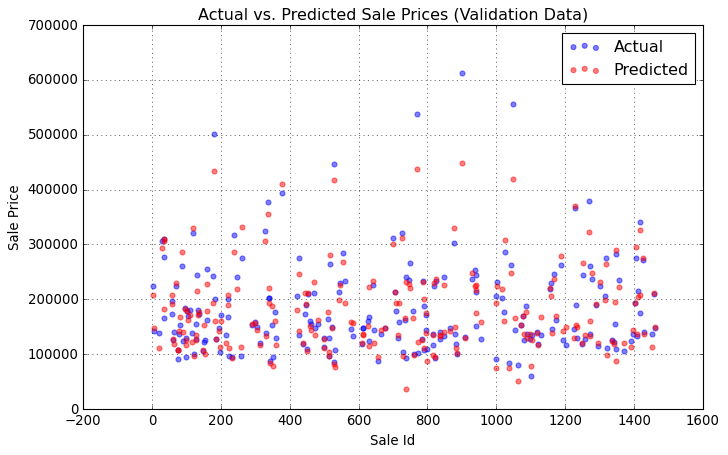

In [42]:
# Calculate R^2 score
r2 = r2_score(Yval, y_pred_val)
print("R^2 score:", r2)

# Plot predicted vs. actual prices
plt.figure(facecolor='white', figsize=(10, 6))
plt.scatter(Xval['Id'], Yval, color='blue', alpha=0.5, label='Actual')
plt.scatter(Xval['Id'], y_pred_val, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Sale Id')
plt.ylabel('Sale Price')
plt.title('Actual vs. Predicted Sale Prices (Validation Data)')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# TEST MODEL
# ------------------------------------------------------------------
# Load test dataset
Xtest = pd.read_csv('data/test.csv')

# Drop 'Id' column
X_test = Xtest.drop(columns=['Id'])

# Map dataset values to strings
X_test = map_categorical_features(X_test)

# Perform one-hot encoding on the predictor variables
X_test = one_hot_encode_dataset(X_test)

# Convert null values to zero
X_test = X_test.fillna(0)

# Map features in validation dataset to match the features in training dataset
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Generate predictions based on trained model
predictions = model.predict(X_test)

# Save predicted prices for submission as CSV file
submission_df = pd.DataFrame({'Id': Xtest['Id'], 
                              'SalePrice': predictions})
submission_df.to_csv('submission/lreg_submission.csv', index=False)

# Log message
print("Submission file successfully created!")

Submission file successfully created!


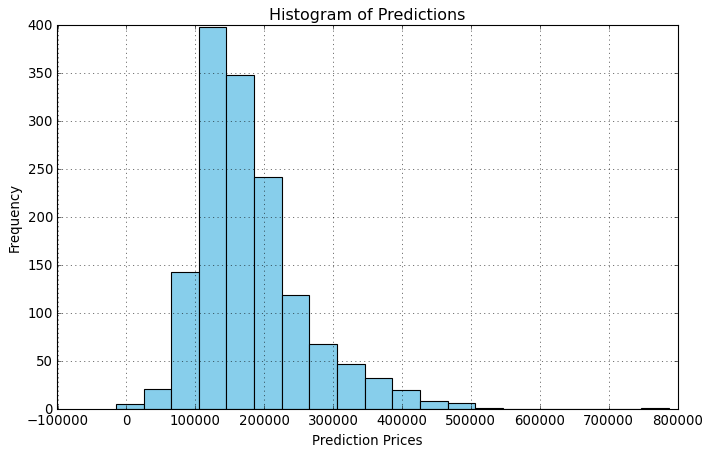

In [44]:
# Plot histogram for prediction values
plt.figure(facecolor='white', figsize=(10, 6))
plt.hist(predictions, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Predictions')
plt.xlabel('Prediction Prices')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()